# Samples from a population of coin flips

- An observation: a coin flip
- A replication = N coin flips = a sample of observations
- M replications

- The number of samples is M and the sample size is N. 
- Each sample was choosen from a population of size n >> N.

In [102]:
%matplotlib inline
from scipy.stats.distributions import bernoulli
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,9]

In [103]:
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [104]:
make_throws(number_of_samples=20, sample_size=10)

array([ 0.5,  0.5,  0.4,  0.5,  0.5,  0.7,  0.3,  0.6,  0.2,  0.6,  0.5,
        0.5,  0.4,  0.4,  0.6,  0.5,  0.7,  0.6,  0.4,  0.5])

In [105]:
# this runs for quite some time
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

In [106]:
len(sample_means[0])

200

Lets formalize what we are up to. Lets call the N random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean

$$\bar{x_m}(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$

Now imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population (ie the sample becomes the population). Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the law of large numbers.

Of course, if you drew many different samples of a size N (which is not infinite), the sample means $\bar{x_1}$, $\bar{x_2}$, etc would all be a bit different from each other. But the law of large numbers intuitively indicates that as the sample size gets very large and becomes an infinite population size, these slightly differeing means would all come together and converge to the population (or distribution) mean.

The mean or expectation of the sample means over the set of samples or replications, at a sample size N:

$$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x_m}(N) ,$$
where $\{R\}$ is the set of M replications, and calculate and plot this quantity.

In [107]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

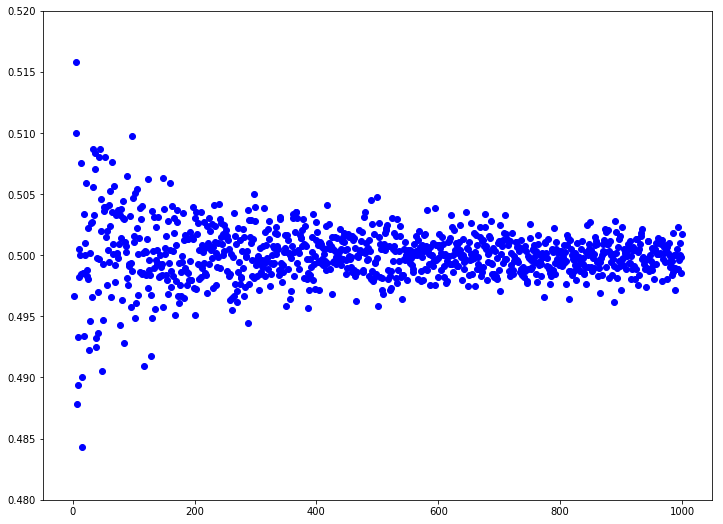

In [117]:
plt.plot(sample_sizes, mean_of_sample_means, 'bo');
plt.ylim([0.480,0.520]);

# A Sampling Distribution

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**. 

Since, in the real world, we see only one sample, this distribution helps us do **inference**, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given, we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the **sampling distribution of the mean**, or the distribution of sample means.

We can see this mathematically by writing the mean or expectation value of the sample means thus:

$$E_{\{R\}}(M\,\bar{x}) = E_{\{R\}}(\bar{x}_1(N) + \bar{x}_2(N) + ... + \bar{x}_M(N)) = E_{\{R\}}(\bar{x}_1) + E_{\{R\}}(\bar{x}_2) + ... + E_{\{R\}}(\bar{x}_M)$$

Now in the limit of sample size, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:

$$\begin{eqnarray}
E_{\{R\}}(M\,\bar{x}) &=& M\, \mu\\
E_{\{R\}}(\bar{x}) &=& \mu
\end{eqnarray}$$


### sampling distribution as a function of sample size

In [109]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

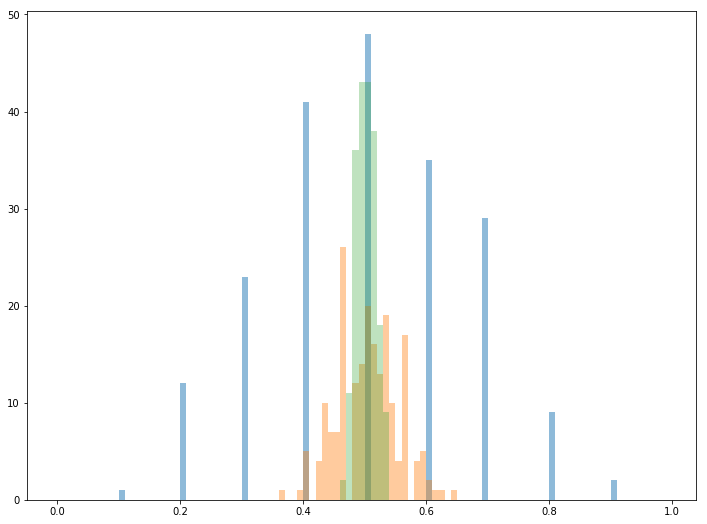

In [110]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

The distribution is much tighter at large sample sizes, and that you can have way low and way large means at small sample sizes. Indeed there are means as small as 0.1 at a sample size of 10, and as small as 0.3 at a sample size of 100.

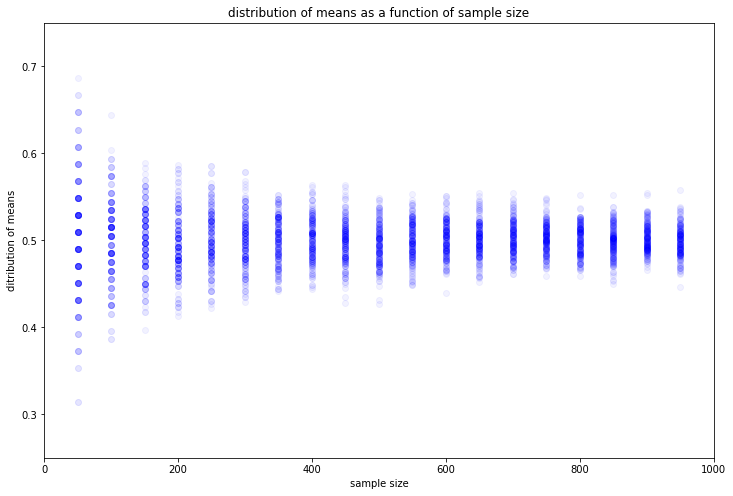

In [111]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,8))
ax.set_title('distribution of means as a function of sample size')
ax.set_xlabel('sample size')
ax.set_ylabel('ditribution of means');

for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], color='b', alpha=0.05);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);


# The variation of the sample mean

We make two more assumptions of the underlying distribution having
- mean $\mu$
- variance $\sigma^2$

Then 

$V(n\bar{x}) = (V(x_1) + V(x_2) + \ldots + V(x_n)) = n\sigma^2$

Hence,

$V(\bar{x})$ = $\sigma^2/n$

Here $x_1, x_2, \ldots$ are results of each coin flips in one replication. Hence $Var(x_i)$ is the variance of population, $\sigma$. Note that $n$ denotes sample size.

This simple formula is called De-Moivre’s formula, and explains the tell-tale triangular plot we saw above, with lots of variation at low sample sizes turning into a tight distribution at large sample size(N).
The square root of V
V
, or the standard deviation of the sampling distribution of the mean (in other words, the distribution of sample means) is also called the Standard Error.

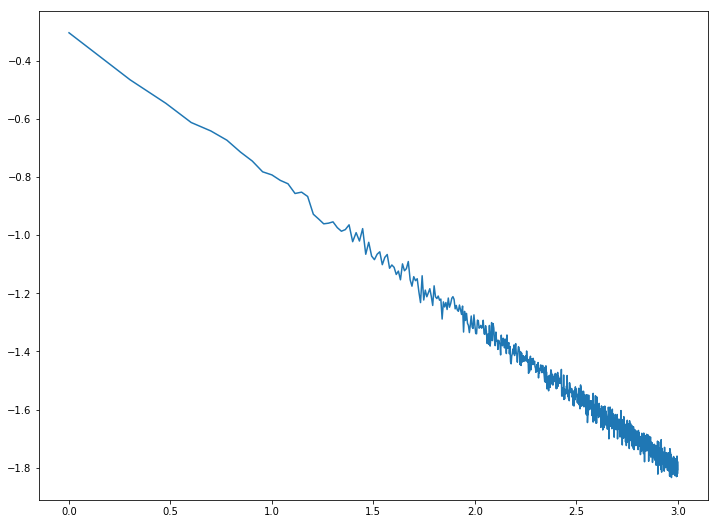

In [112]:
std_of_sample_means = [np.std(means) for means in sample_means]
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means));

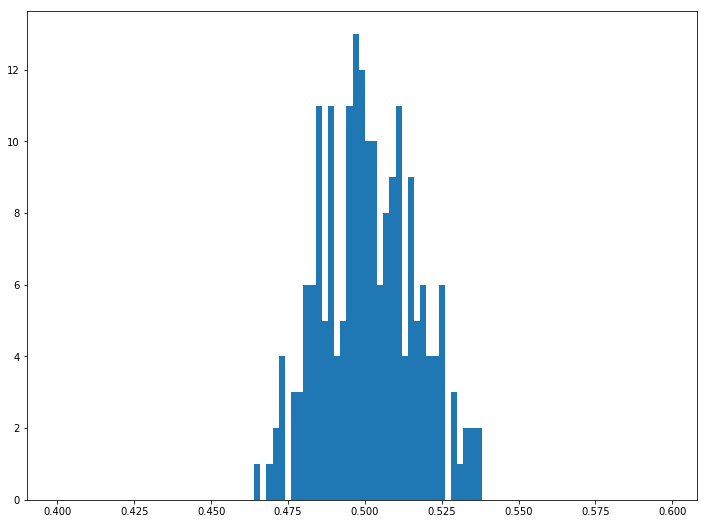

In [113]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6, 0.002));

In [114]:
sample_means_at_size_1000.shape

(200,)

# The sampling distribution of the Variance

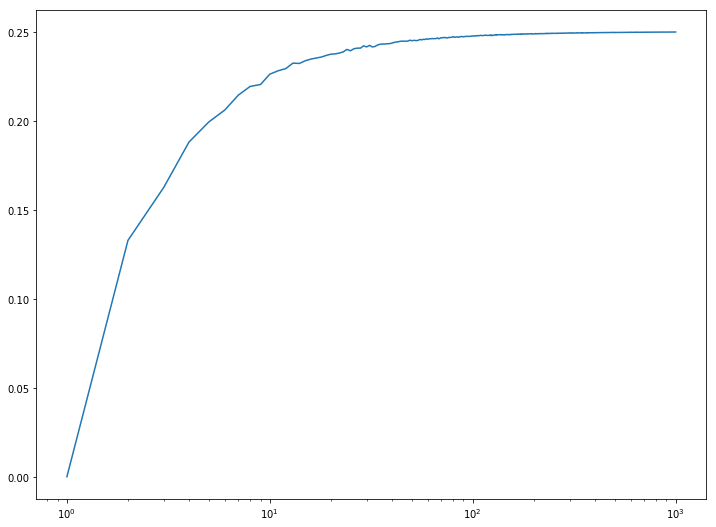

In [115]:
# this run for like 10mins
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000);
plt.xscale("log");

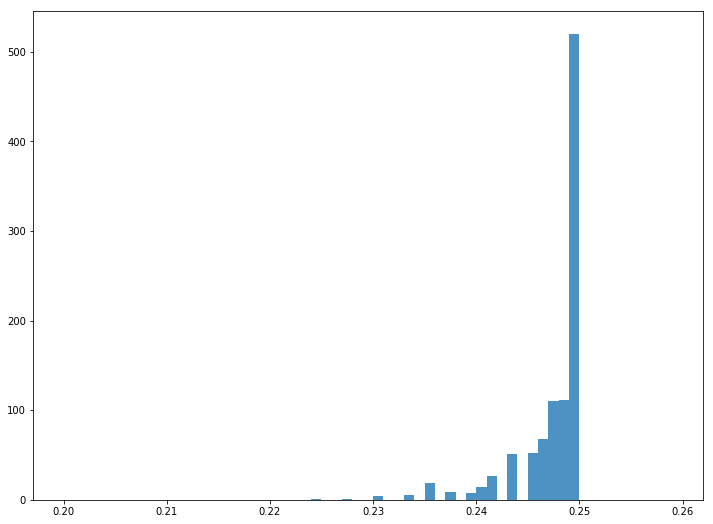

In [116]:
plt.hist(sample_vars_1000_replicates[99], bins=np.arange(0.2,0.26,0.001), alpha=0.8, normed=True);
